## Visualisation
- Histogram
- Boxplot
- Emprical Cumulative Density Plot (to see all the points)
- Regression plot

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

dir_data = '/Users/chloe/Google Drive/Kaggle_Data/kaggle_home_credit_default_risk/'
f_app = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app)

### Histogram

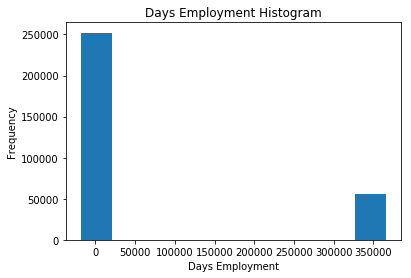

In [2]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

### Boxplot

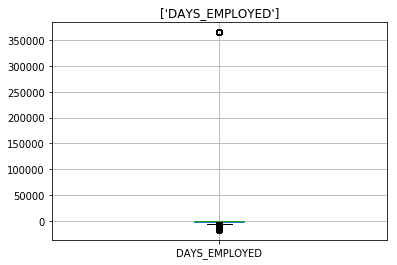

In [3]:
col = ["DAYS_EMPLOYED"]
app_train.boxplot(column=col)
plt.title(col)
plt.show();

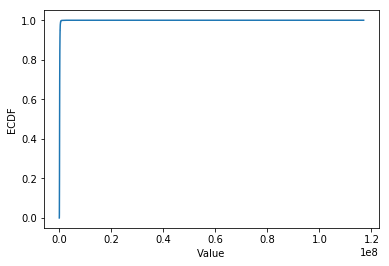

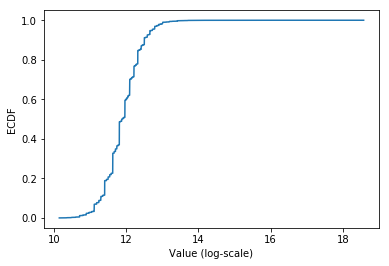

In [4]:
cdf = app_train['AMT_INCOME_TOTAL'].value_counts().sort_index().cumsum()

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
#plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

### Regression Plot

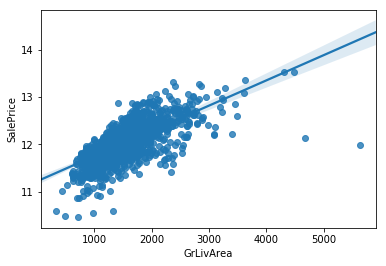

In [5]:
data_path = '/Users/chloe/Google Drive/Kaggle_Data/kaggle_house_price/'
df_train = pd.read_csv(data_path + 'train.csv')

train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)


import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df['GrLivArea'], y=train_Y)
plt.show();
